# Explnation of Standardization
---


https://kraj3.com.np/blog/2019/06/easy-explanation-of-normalization-standardization-in-machine-learningusing-python/

In [0]:
# !pip freeze

# Import libraries and Set up Dataframe


In [0]:
#Basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rand

#sklearn imports --ADD on a need to use basis
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,minmax_scale, KBinsDiscretizer
from sklearn.metrics import mean_squared_error


In [0]:
url = 'https://raw.githubusercontent.com/julio-aguilar/ml-data-mining/master/A1_datasets/istanbul_stock_exchange.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
date             536 non-null object
TL BASED ISE     536 non-null float64
USD BASED ISE    536 non-null float64
SP               536 non-null float64
DAX              536 non-null float64
FTSE             536 non-null float64
NIKKEI           536 non-null float64
BOVESPA          536 non-null float64
EU               536 non-null float64
EM               536 non-null float64
dtypes: float64(9), object(1)
memory usage: 42.0+ KB


,date,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


A deep copy  will be created to make sure that the original df is still available to do any more manipulation on it.

In [0]:
stock_df = df.drop(['date'],axis=1).copy(deep=True)

# Normalization

#### Z-score Normalization

In [0]:
tempZ=StandardScaler().fit_transform(stock_df)
z_norm_df=pd.DataFrame(tempZ,columns=stock_df.columns)
z_norm_df.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2.100107,1.745028,-0.378032,0.101256,0.267647,-0.020741,1.922674,0.942176,2.629645
1,1.464512,1.433997,0.507353,0.531818,0.977179,0.259819,1.142884,0.837583,0.746969
2,-1.876450,-1.322382,-2.209720,-1.275742,-2.312967,1.144844,-2.340765,-1.351789,-1.997012
3,-3.928648,-4.088108,0.195178,-0.855846,-0.077213,-2.720969,1.737932,-0.464755,-1.940619
4,0.506553,0.384125,-1.575058,-1.415989,-1.045565,-0.322265,-0.679926,-0.882979,-0.832891


#### Min-Max Normalization

In [0]:
temp_min_max=MinMaxScaler().fit_transform(stock_df)
min_max_df = pd.DataFrame(temp_min_max,columns=stock_df.columns)
min_max_df.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.746889,0.664154,0.404333,0.489969,0.558409,0.451728,0.722875,0.530944,0.776771
1,0.668147,0.628741,0.505990,0.546240,0.643736,0.489000,0.618569,0.519229,0.548080
2,0.254242,0.314902,0.194024,0.310007,0.248066,0.606576,0.152590,0.273987,0.214765
3,0.000000,0.000000,0.470147,0.364884,0.516936,0.093003,0.698163,0.373348,0.221615
4,0.549467,0.509203,0.266894,0.291678,0.400483,0.411670,0.374747,0.326501,0.356172


#### Softmax Normalization

In [0]:
min_max_df.apply(lambda x: 1/(1+ np.exp(-x)), axis=0).head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.678500,0.660193,0.599728,0.620099,0.636084,0.611050,0.673240,0.629703,0.684984
1,0.661088,0.652204,0.623866,0.633263,0.655598,0.619871,0.649893,0.626967,0.633690
2,0.563220,0.578081,0.548354,0.576887,0.561701,0.647159,0.538074,0.568072,0.553486
3,0.500000,0.500000,0.615419,0.590222,0.626431,0.523234,0.667780,0.592268,0.555178
4,0.634012,0.624620,0.566330,0.572407,0.598804,0.601488,0.592605,0.580908,0.588114


# Discrete the Columns

In [0]:
continuous_cols = min_max_df.columns.values
discrete_df = min_max_df.copy(deep=True)
# for col in continuous_cols:
#   discrete_df[col] = (pd.qcut(stock_df[col],10))

# discrete_df
discreter = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
discrete_df = pd.DataFrame(discreter.fit_transform(discrete_df),columns=continuous_cols)
discrete_df.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,7.0,6.0,4.0,4.0,5.0,4.0,7.0,5.0,7.0
1,6.0,6.0,5.0,5.0,6.0,4.0,6.0,5.0,5.0
2,2.0,3.0,1.0,3.0,2.0,6.0,1.0,2.0,2.0
3,0.0,0.0,4.0,3.0,5.0,0.0,6.0,3.0,2.0
4,5.0,5.0,2.0,2.0,4.0,4.0,3.0,3.0,3.0


# Boxplot

#### Before Discretization

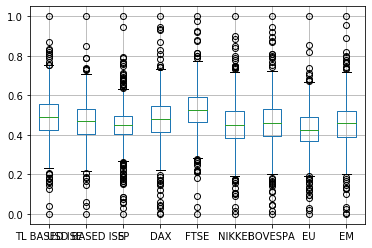

In [0]:
min_max_df.boxplot()

#### After Discretization

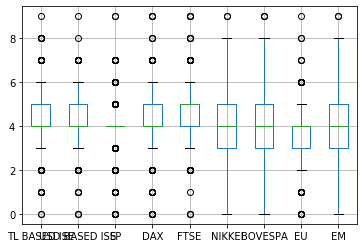

In [0]:
discrete_df.boxplot()

# Impute Missing Values

---
In this section, the data will be manipulated to then impute back the missing values into it.  
The data will be manipulated: 
- Synthetic 5% values lost  
- Synthetic 10% values lost  
- Synthetic 15% values lost  


#### At 5% Missing Values


In [0]:
#simulando un 5% de celdas missing
df5 = stock_df.copy(deep=True)
df5 = df5.stack().sample(frac=0.95).unstack().reindex(index=df5.index, columns=df5.columns)
df5.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,NaN,-0.007802


#####Part 2: Imputing Feature Values

Imputing with Mean

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df5)
df_filled_mean5 = imp.transform(df5)
df_filled_mean5 = pd.DataFrame(df_filled_mean5,columns=df5.columns.values)
df_filled_mean5.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,0.000610,-0.007802


Imputing with Median

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df5)
df_filled_median5 = imp.transform(df5)
df_filled_median5 = pd.DataFrame(df_filled_median5,columns=df5.columns.values)
df_filled_median5.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,0.000376,-0.007802


Imputing with KNN

In [0]:
imputer = KNNImputer(n_neighbors=5)
df_filled_KNN5 = imputer.fit_transform(df5)


In [0]:
df_filled_KNN5 = pd.DataFrame(df_filled_KNN5,columns=df5.columns.values)

In [0]:
df_filled_KNN5.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.013599,-0.007802


#### At 10% Missing Values

In [0]:
#simulando un 10% de celdas missing
df10 = stock_df.copy(deep=True)
df10 = df10.stack().sample(frac=0.90).unstack().reindex(index=df10.index, columns=df10.columns)
df10.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,NaN,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,NaN
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,NaN,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


#####Part 2: Imputing Feature Values

Imputing with Mean

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df10)
df_filled_mean10 = imp.transform(df10)
df_filled_mean10 = pd.DataFrame(df_filled_mean10,columns=df10.columns.values)
df_filled_mean10.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.001039,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.000890
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,0.001796,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


Imputing with Median

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df10)
df_filled_median10 = imp.transform(df10)
df_filled_median10 = pd.DataFrame(df_filled_median10,columns=df10.columns.values)
df_filled_median10.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.002742,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.001077
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,0.002251,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


Imputing with KNN

In [0]:
imputer = KNNImputer(n_neighbors=5)
df_filled_KNN10 = imputer.fit_transform(df10)


In [0]:
df_filled_KNN10 = pd.DataFrame(df_filled_KNN10,columns=df10.columns.values)

In [0]:
df_filled_KNN10.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.030584,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008625
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,-0.001721,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


#### At 15% Missing Values

In [0]:
#simulando un 15% de celdas missing
df15 = stock_df.copy(deep=True)
df15 = df15.stack().sample(frac=0.85).unstack().reindex(index=df15.index, columns=df15.columns)
df15.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,NaN,0.028524
1,0.025426,NaN,0.007787,NaN,0.012866,NaN,0.018920,0.011341,0.008773
2,-0.028862,NaN,-0.030469,-0.017833,-0.028735,NaN,NaN,-0.017073,NaN
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,NaN,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


#####Part 2: Imputing Feature Values

Imputing with Mean

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df15)
df_filled_mean15 = imp.transform(df15)
df_filled_mean15 = pd.DataFrame(df_filled_mean15,columns=df15.columns.values)
df_filled_mean15.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.000718,0.028524
1,0.025426,0.001513,0.007787,0.000386,0.012866,0.000059,0.018920,0.011341,0.008773
2,-0.028862,0.001513,-0.030469,-0.017833,-0.028735,0.000059,0.001566,-0.017073,0.000788
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,0.000718,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


Imputing with Median

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df15)
df_filled_median15 = imp.transform(df15)
df_filled_median15 = pd.DataFrame(df_filled_median15,columns=df15.columns.values)
df_filled_median15.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.000464,0.028524
1,0.025426,0.002517,0.007787,0.001322,0.012866,0.000000,0.018920,0.011341,0.008773
2,-0.028862,0.002517,-0.030469,-0.017833,-0.028735,0.000000,0.000798,-0.017073,0.000968
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,0.000464,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


Imputing with KNN

In [0]:
imputer = KNNImputer(n_neighbors=5)
df_filled_KNN15 = imputer.fit_transform(df15)


In [0]:
df_filled_KNN15 = pd.DataFrame(df_filled_KNN15,columns=df15.columns.values)

In [0]:
df_filled_KNN15.head(5)

,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.009662,0.028524
1,0.025426,0.013844,0.007787,0.015197,0.012866,0.016628,0.018920,0.011341,0.008773
2,-0.028862,-0.021283,-0.030469,-0.017833,-0.028735,0.000345,-0.024745,-0.017073,-0.017724
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.012801,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


# MSE Values

---
This section will calculate the Mean Square Error between each of the different imputed values at 5%, 10% and 15%


#### MSE for 5%

Mean

In [0]:
mean_squared_error(stock_df,df_filled_mean5)

9.391592652963941e-06

Median

In [0]:
mean_squared_error(stock_df,df_filled_median5)

9.419210020116069e-06

KNN

In [0]:
mean_squared_error(stock_df,df_filled_KNN5)

3.6572457366048012e-06

#### MSE for 10%

Mean

In [0]:
mean_squared_error(stock_df,df_filled_mean10)

2.5908612644452107e-05

Median

In [0]:
mean_squared_error(stock_df,df_filled_median10)

2.5660488249243253e-05

KNN

In [0]:
mean_squared_error(stock_df,df_filled_KNN10)

8.415567069937365e-06

#### MSE for 15%

Mean

In [0]:
mean_squared_error(stock_df,df_filled_mean15)

2.9919866287995483e-05

Median

In [0]:
mean_squared_error(stock_df,df_filled_median15)

2.9783882652909058e-05

KNN

In [0]:
mean_squared_error(stock_df,df_filled_KNN15)

1.3895105721290314e-05